**load the data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
tabular_playground = pd.read_csv('/content/drive/MyDrive/tabular-playground-series-aug-2022/tabular-playground')
data_train = pd.read_csv('/content/drive/MyDrive/tabular-playground-series-aug-2022/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/tabular-playground-series-aug-2022/test.csv')


In [4]:
data_train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

**clean the data (missing values)**

In [ ]:
missing_val_count_by_column = (data_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

loading            250
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
dtype: int64


use the statistic mean value to fill the missing values

In [6]:
for column in list(data_train.columns[data_train.isnull().sum() > 0]):
  mean_val = data_train[column].mean()
  data_train[column].fillna(mean_val, inplace = True)


In [7]:
missing_val_count_by_column = (data_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


outlier detecting


In [8]:
"""
find the total number of continuous features' outliers
"""
import numpy as np
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

for column in data_train.columns:
  if data_train[column].dtypes == 'object': continue
  print(f'for column {column}, the number of outlier_count is: {outlier_function(data_train, column)[2]} ')

for column id, the number of outlier_count is: 0 
for column loading, the number of outlier_count is: 44 
for column attribute_2, the number of outlier_count is: 0 
for column attribute_3, the number of outlier_count is: 0 
for column measurement_0, the number of outlier_count is: 1 
for column measurement_1, the number of outlier_count is: 0 
for column measurement_2, the number of outlier_count is: 13 
for column measurement_3, the number of outlier_count is: 0 
for column measurement_4, the number of outlier_count is: 1 
for column measurement_5, the number of outlier_count is: 1 
for column measurement_6, the number of outlier_count is: 1 
for column measurement_7, the number of outlier_count is: 0 
for column measurement_8, the number of outlier_count is: 1 
for column measurement_9, the number of outlier_count is: 0 
for column measurement_10, the number of outlier_count is: 5 
for column measurement_11, the number of outlier_count is: 1 
for column measurement_12, the number of 

In [9]:
"""
clean the outliers of continuous features
"""
features_to_clean_outliers = ['loading', 'measurement_2', 'measurement_10', 'measurement_13']
for feature in features_to_clean_outliers:
  data_train = data_train[(data_train[feature] > outlier_function(data_train, feature)[0]) & (data_train[feature] < outlier_function(data_train, feature)[1])] 

In [10]:
for column in data_train.columns:
  if data_train[column].dtypes == 'object': continue
  print(f'for column {column}, the number of outlier_count is: {outlier_function(data_train, column)[2]} ')

for column id, the number of outlier_count is: 0 
for column loading, the number of outlier_count is: 0 
for column attribute_2, the number of outlier_count is: 0 
for column attribute_3, the number of outlier_count is: 0 
for column measurement_0, the number of outlier_count is: 1 
for column measurement_1, the number of outlier_count is: 0 
for column measurement_2, the number of outlier_count is: 0 
for column measurement_3, the number of outlier_count is: 0 
for column measurement_4, the number of outlier_count is: 1 
for column measurement_5, the number of outlier_count is: 1 
for column measurement_6, the number of outlier_count is: 1 
for column measurement_7, the number of outlier_count is: 0 
for column measurement_8, the number of outlier_count is: 1 
for column measurement_9, the number of outlier_count is: 0 
for column measurement_10, the number of outlier_count is: 0 
for column measurement_11, the number of outlier_count is: 1 
for column measurement_12, the number of ou

Label Encoding

In [11]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = ['product_code', 'attribute_0', 'attribute_1']
for feat in objList:
    data_train[feat] = le.fit_transform(data_train[feat].astype(str))
    data_test[feat] = le.fit_transform(data_test[feat].astype(str))
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26476 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26476 non-null  int64  
 1   product_code    26476 non-null  int64  
 2   loading         26476 non-null  float64
 3   attribute_0     26476 non-null  int64  
 4   attribute_1     26476 non-null  int64  
 5   attribute_2     26476 non-null  int64  
 6   attribute_3     26476 non-null  int64  
 7   measurement_0   26476 non-null  int64  
 8   measurement_1   26476 non-null  int64  
 9   measurement_2   26476 non-null  int64  
 10  measurement_3   26476 non-null  float64
 11  measurement_4   26476 non-null  float64
 12  measurement_5   26476 non-null  float64
 13  measurement_6   26476 non-null  float64
 14  measurement_7   26476 non-null  float64
 15  measurement_8   26476 non-null  float64
 16  measurement_9   26476 non-null  float64
 17  measurement_10  26476 non-null 

exploratory data analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


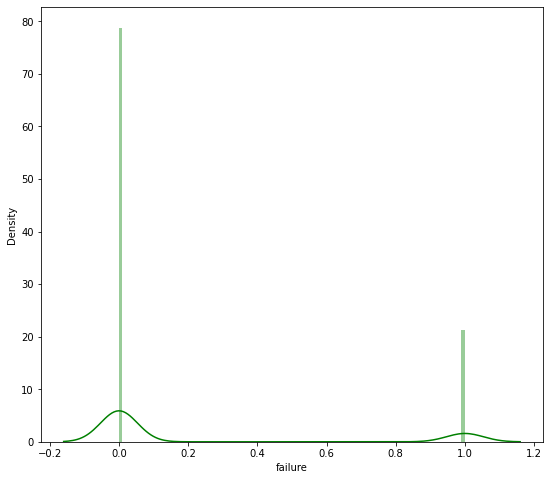

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.distplot(data_train['failure'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
data_train['failure'].value_counts()

0    20863
1     5613
Name: failure, dtype: int64

Based on the figure above, we can find out that the data is imbalanced!


show the distribution of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc645301850>,
      dtype=object)

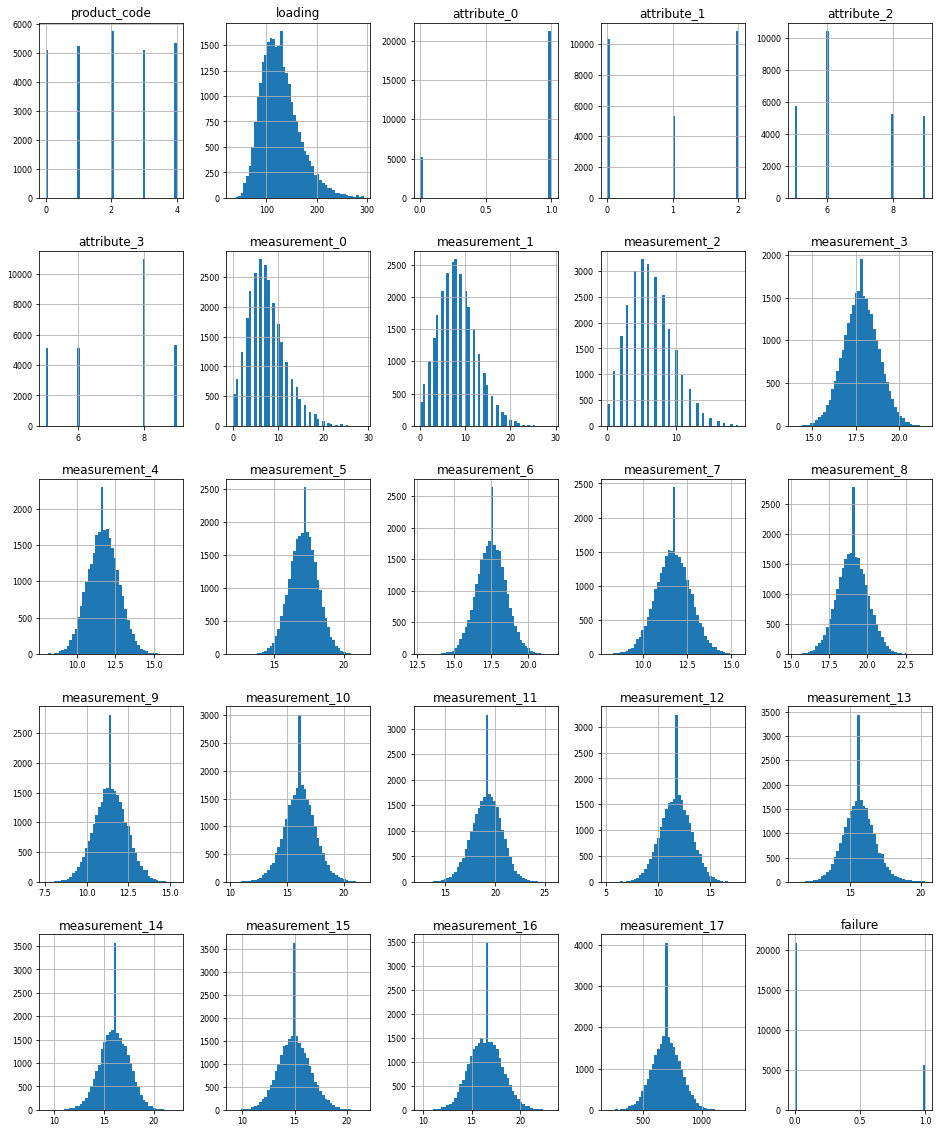

In [14]:
del data_train['id']
data_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

distribution of categorical features

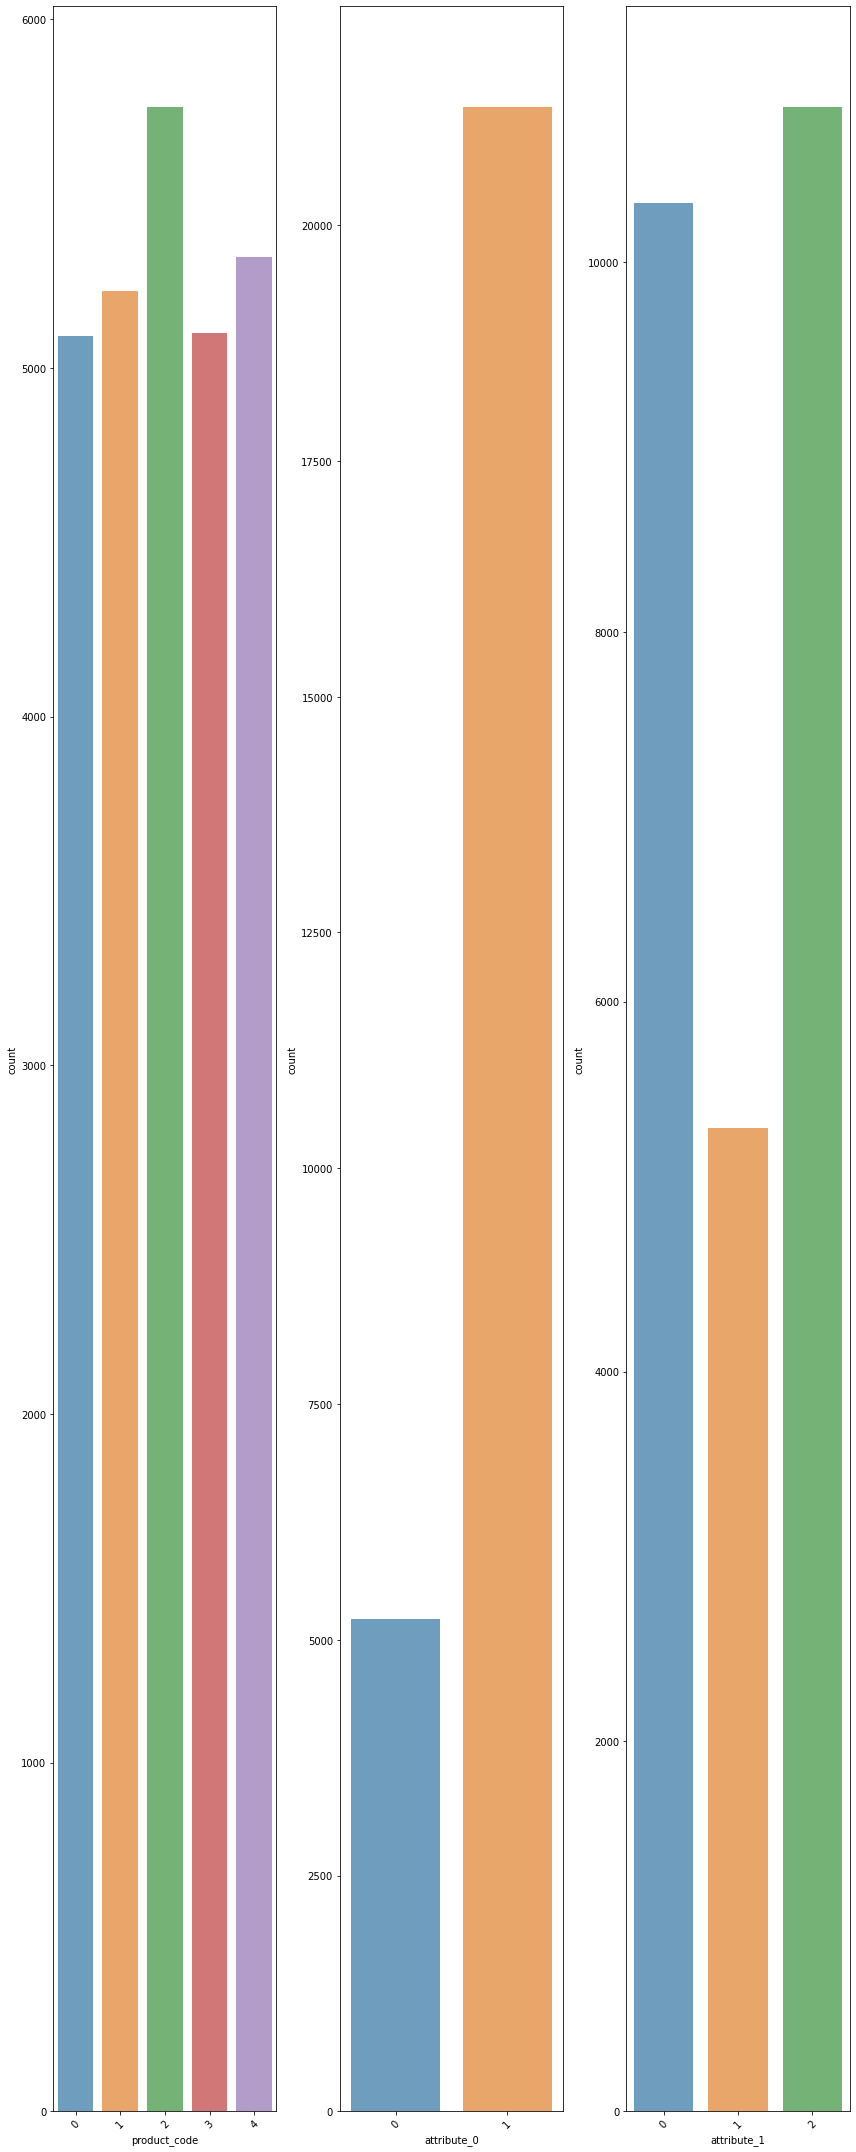

In [15]:
data_categorical_num= data_train[['product_code', 'attribute_0', 'attribute_1']]
fig, axes = plt.subplots(round(len(data_categorical_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(data_categorical_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=data_categorical_num.columns[i], alpha=0.7, data=data_categorical_num, ax=ax)

fig.tight_layout()

show the relationship between features and "failure"

In [ ]:
data_corr = data_train.corr()['failure'][:-1]

golden_features_list = data_corr[abs(data_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))
print(data_corr)

There is 12 strongly correlated values with Class:
loading           0.127465
measurement_17    0.032897
measurement_5     0.017908
measurement_8     0.017173
measurement_7     0.016879
attribute_0       0.015667
measurement_6     0.013944
measurement_2     0.013547
attribute_1       0.011866
measurement_4    -0.010215
measurement_1    -0.010382
attribute_3      -0.019709
Name: failure, dtype: float64
product_code     -0.008012
loading           0.127465
attribute_0       0.015667
attribute_1       0.011866
attribute_2       0.006002
attribute_3      -0.019709
measurement_0     0.009416
measurement_1    -0.010382
measurement_2     0.013547
measurement_3     0.004443
measurement_4    -0.010215
measurement_5     0.017908
measurement_6     0.013944
measurement_7     0.016879
measurement_8     0.017173
measurement_9    -0.003651
measurement_10   -0.001203
measurement_11   -0.005549
measurement_12    0.004785
measurement_13   -0.002464
measurement_14    0.005922
measurement_15   -0.003587
m

show the relationship between each pair of features

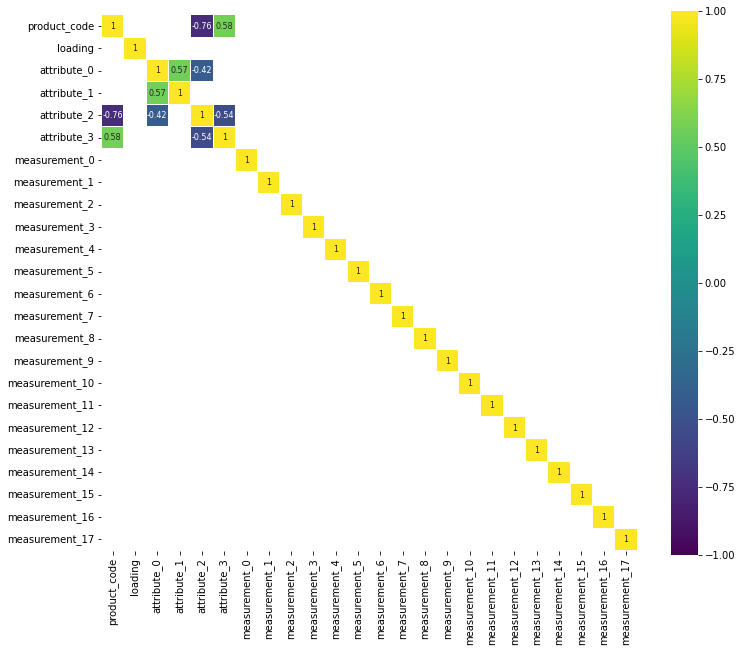

In [ ]:
corr = data_train.drop('failure', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

relationship between features and "failure"

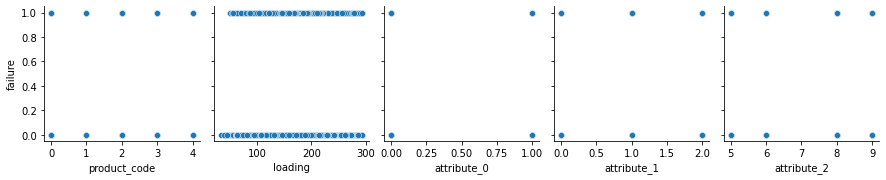

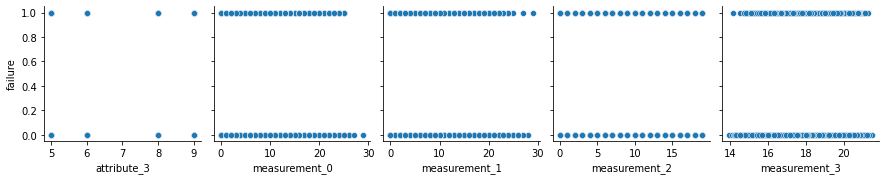

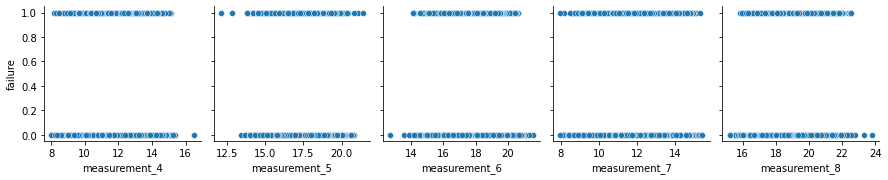

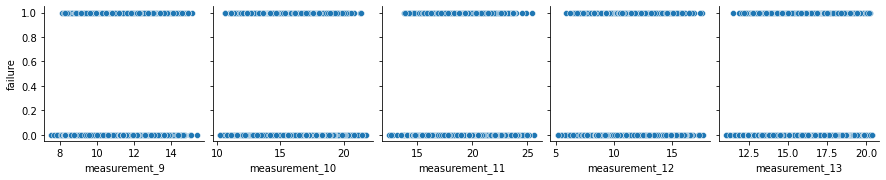

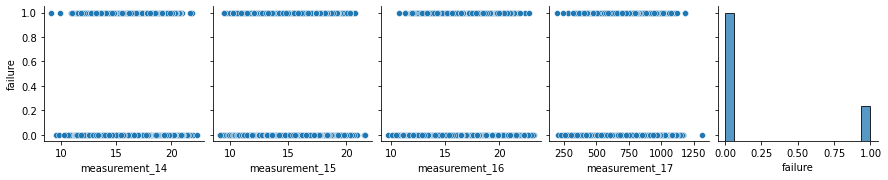

In [ ]:
for i in range(0, len(data_train.columns), 5):
    sns.pairplot(data=data_train,
                x_vars=data_train.columns[i:i+5],
                y_vars=['failure'])

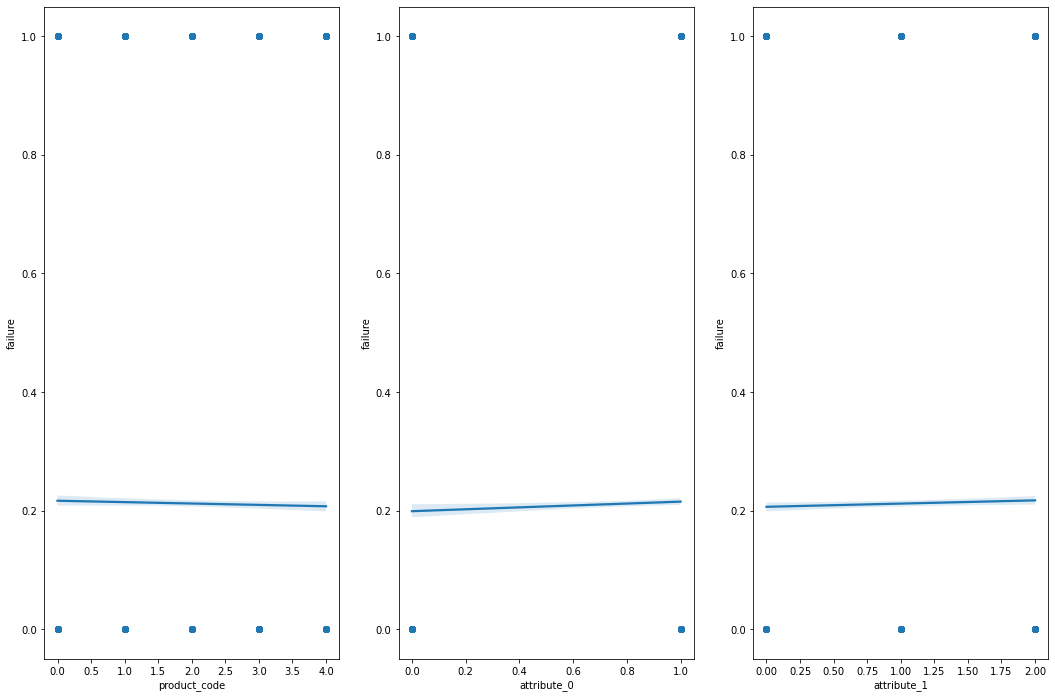

In [ ]:
features_to_analyse = ['product_code', 'attribute_0', 'attribute_1','failure']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='failure', data=data_train[features_to_analyse], ax=ax)

split data into train, validation and test set


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, ShuffleSplit
from collections import Counter
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

In [17]:
# Count samples per class
classes_zero = data_train[data_train['failure'] == 0]
classes_one = data_train[data_train['failure'] == 1]
print(classes_zero)
print(f'Class 0: {len(classes_zero)}')
print(f'Class 1: {len(classes_one)}')

# Oversample one to the size of zero
classes_one = classes_one.sample(len(classes_zero), replace=True)

# Print sizes
print(f'Class 0: {len(classes_zero)}')
print(f'Class 1: {len(classes_one)}')

       product_code  loading  attribute_0  attribute_1  attribute_2  \
0                 0    80.10            1            2            9   
1                 0    84.89            1            2            9   
2                 0    82.43            1            2            9   
3                 0   101.07            1            2            9   
4                 0   188.06            1            2            9   
...             ...      ...          ...          ...          ...   
26565             4   158.95            1            1            6   
26566             4   146.02            1            1            6   
26567             4   115.62            1            1            6   
26568             4   106.38            1            1            6   
26569             4   131.20            1            1            6   

       attribute_3  measurement_0  measurement_1  measurement_2  \
0                5              7              8              4   
1            

In [18]:
frames = [classes_zero, classes_one]
data_train = pd.concat(frames)
data_train

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,80.10,1,2,9,5,7,8,4,18.040,...,10.672,15.859,17.594000,15.193,15.029000,16.048444,13.034,14.684,764.100,0
1,0,84.89,1,2,9,5,14,3,3,18.213,...,12.448,17.947,17.915000,11.755,14.732000,15.425000,14.395,15.631,682.057,0
2,0,82.43,1,2,9,5,12,1,5,18.057,...,12.715,15.607,19.172085,13.798,16.711000,18.631000,14.094,17.946,663.376,0
3,0,101.07,1,2,9,5,13,2,6,17.295,...,12.471,16.346,18.377000,10.020,15.250000,15.562000,16.154,17.172,826.282,0
4,0,188.06,1,2,9,5,9,2,8,19.346,...,10.337,17.082,19.932000,12.428,16.182000,12.760000,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,4,183.69,1,1,6,9,3,11,6,18.145,...,11.255,13.105,19.086000,10.683,14.602000,19.113000,14.470,18.585,599.897,1
25295,4,159.39,1,1,6,9,4,9,3,18.977,...,13.221,15.562,21.207000,13.896,15.652904,14.077000,14.082,17.871,726.996,1
2750,0,134.64,1,2,9,5,5,2,3,18.890,...,11.354,16.308,17.327000,12.029,16.684000,15.836000,15.475,16.907,687.857,1
24419,4,126.62,1,1,6,9,2,14,1,17.102,...,9.318,16.428,18.224000,9.449,15.833000,15.213000,14.270,17.149,758.962,1


In [19]:
#split the data to train and test set
y = data_train['failure']
x = data_train.iloc[:,:-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
16361,3,72.96,1,0,6,6,6,10,6,16.173,...,18.886,10.551000,15.716000,20.277,13.193,15.358,15.534000,13.141,18.841000,701.269059
10824,2,146.49,1,2,5,8,6,8,8,16.728,...,20.143,11.298000,16.117711,17.039,11.186,14.069,18.212000,16.233,16.215000,799.779000
19150,3,167.60,1,0,6,6,7,7,8,16.433,...,20.563,10.617000,15.251000,17.888,11.900,16.998,13.280000,16.683,16.848000,701.269059
14878,2,108.42,1,2,5,8,2,6,5,18.074,...,18.949,11.506000,14.974000,18.517,12.204,16.698,14.439000,15.614,16.460727,773.745000
13174,2,141.37,1,2,5,8,4,4,10,17.434,...,18.713,11.430725,16.848000,15.757,10.597,16.461,16.048444,13.103,12.331000,701.269059


In [20]:
#scale the numeric features
features_to_scale = ['loading','measurement_3','measurement_4','measurement_5','measurement_6',
                     'measurement_7','measurement_8','measurement_9','measurement_10','measurement_11',
                     'measurement_12','measurement_13','measurement_14','measurement_15','measurement_16','measurement_17']
scaler = StandardScaler()
quantile_trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
for feature in features_to_scale:
  feature_scale_param = scaler.fit(X_train[feature].values.reshape(-1,1))
  X_train[feature] = scaler.fit_transform(X_train[feature].values.reshape(-1,1), feature_scale_param)
  X_train[feature] = quantile_trans.fit_transform(X_train[feature].values.reshape(-1,1))
data_train.head()
for feature in features_to_scale:
  feature_scale_param = scaler.fit(X_validation[feature].values.reshape(-1,1))
  X_validation[feature] = scaler.fit_transform(X_validation[feature].values.reshape(-1,1), feature_scale_param)

In [21]:
X_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
16361,3,-1.836935,1,0,6,6,6,10,6,-1.639755,...,-0.191052,-0.909376,-0.354972,0.772046,1.034270,-0.315311,-0.412991,-1.269962,1.435787,-0.037988
10824,2,0.528951,1,2,5,8,6,8,8,-1.083215,...,1.135469,-0.187537,0.000000,-1.422116,-0.403737,-1.456516,1.490751,0.878063,-0.207133,0.844940
19150,3,0.982336,1,0,6,6,7,7,8,-1.371771,...,1.532310,-0.846087,-0.685472,-0.879230,0.183288,1.262972,-1.901507,1.148973,0.307885,-0.037988
14878,2,-0.485741,1,2,5,8,2,6,5,0.292243,...,-0.129490,0.133812,-0.895780,-0.487576,0.381976,1.019458,-1.134416,0.498433,0.012660,0.635319
13174,2,0.410428,1,2,5,8,4,4,10,-0.380523,...,-0.359539,0.012660,0.605826,-2.163604,-0.789365,0.813010,0.012660,-1.293590,-2.362794,-0.037988


In [ ]:
"""
prepare labels for classification
(1)use label encoder to change the label to连续型数值变量
(2)use to_categorical to change the label to one-hot encoding vector

le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))
Y_validation = le.transform(Y_validation.astype(str))

Y_train = to_categorical(Y_train)
Y_validation = to_categorical(Y_validation)
"""

'\nprepare labels for classification\n(1)use label encoder to change the label to连续型数值变量\n(2)use to_categorical to change the label to one-hot encoding vector\n\nle = LabelEncoder()\nY_train = le.fit_transform(Y_train.astype(str))\nY_validation = le.transform(Y_validation.astype(str))\n\nY_train = to_categorical(Y_train)\nY_validation = to_categorical(Y_validation)\n'

Build the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from tensorflow import keras

In [ ]:
def create_basic_cnn_model(X_train, Y_train, X_validation, Y_validation):
  model = keras.Sequential([layers.BatchNormalization(input_shape = [X_train.shape[1]]),
                         layers.Dense(1024,activation='gelu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.5),
                         layers.Dense(1024,activation='gelu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.5),
                         layers.Dense(1024,activation='gelu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.5),
                         layers.Dense(1024,activation='gelu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.5),
                         layers.Dense(1024,activation='gelu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.5),
                         layers.Dense(1,activation='sigmoid')])

  #compile the model
  #optimizer:优化器
  #loss:目标函数（损失函数）
  #metrics:评价模型性能的指标
  METRICS = [
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = METRICS)
  early_stopping = keras.callbacks.EarlyStopping(
      patience=5,
      min_delta=0.01,
      restore_best_weights=True
      )
  number_0, number_1 = np.bincount(Y_train)
  weight_for_0 = (1 / number_0) * (len(X_train) / 2.0)
  weight_for_1 = (1 / number_1) * (len(X_train) / 2.0)

  class_weight = {0: weight_for_0, 1: weight_for_1}
  history = model.fit(
    X_train, Y_train,
    validation_data=(X_validation, Y_validation),
    batch_size = 256,
    epochs=200,
    callbacks=[early_stopping],
    class_weight = class_weight
)
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
  history_df.loc[:, ['accuracy','val_auc']].plot(title="Accuracy")
  return model

Epoch 1/200
131/131 [==============================] - 33s 225ms/step - loss: 0.8995 - accuracy: 0.5179 - precision: 0.5180 - recall: 0.5165 - auc: 0.5246 - prc: 0.5188 - val_loss: 0.7107 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5551 - val_prc: 0.5541
Epoch 2/200
131/131 [==============================] - 29s 222ms/step - loss: 0.7149 - accuracy: 0.5321 - precision: 0.5323 - recall: 0.5300 - auc: 0.5487 - prc: 0.5451 - val_loss: 0.6886 - val_accuracy: 0.5353 - val_precision: 0.5595 - val_recall: 0.3321 - val_auc: 0.5623 - val_prc: 0.5605
Epoch 3/200
131/131 [==============================] - 30s 226ms/step - loss: 0.6905 - accuracy: 0.5535 - precision: 0.5534 - recall: 0.5548 - auc: 0.5748 - prc: 0.5611 - val_loss: 0.6859 - val_accuracy: 0.5391 - val_precision: 0.5799 - val_recall: 0.2835 - val_auc: 0.5762 - val_prc: 0.5689
Epoch 4/200
131/131 [==============================] - 30s 228ms/step - loss: 0.6869 - accuracy: 0.5554 - precision:

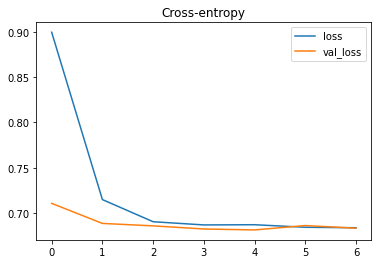

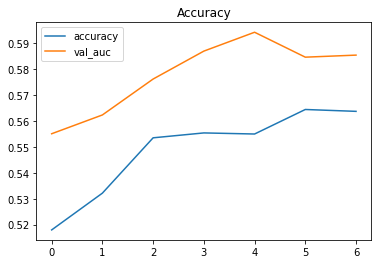

In [ ]:
basic_cnn_model = create_basic_cnn_model(X_train, Y_train, X_validation, Y_validation)

xgboost model

In [23]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score,balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [ ]:
X_train

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
16361,3,-1.815449,1,0,6,6,6,10,6,-1.635255,...,-0.189142,-0.901045,-0.345629,0.774640,1.052160,-0.311156,-0.409544,-1.260575,1.435857,-0.025322
10824,2,0.543533,1,2,5,8,6,8,8,-1.065973,...,1.131873,-0.184720,0.012660,-1.417313,-0.387040,-1.451425,1.508944,0.865573,-0.201990,0.851484
13861,2,-0.985590,1,2,5,8,8,9,3,-2.390489,...,-1.759707,-0.749295,-0.196364,-1.797179,-0.274206,0.963454,1.485187,0.012660,-0.865400,-0.025322
14878,2,-0.476627,1,2,5,8,2,6,5,0.295415,...,-0.125406,0.142268,-0.884378,-0.511998,0.396106,1.017984,-1.138985,0.494285,0.012660,0.652621
13174,2,0.421854,1,2,5,8,4,4,10,-0.373324,...,-0.346763,0.012660,0.596373,-2.159807,-0.782118,0.813614,0.012660,-1.284945,-2.363133,-0.025322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24842,4,0.157014,1,1,6,9,3,12,6,-0.285633,...,1.250176,0.860890,-0.103504,0.694802,-0.246630,-0.138061,-2.051542,-0.906118,-0.933630,2.047781
9045,1,0.344839,0,0,8,8,6,13,11,-0.697516,...,-0.156777,0.598845,-0.928121,1.639849,0.000000,-0.098059,-0.381976,0.012660,-0.151481,-0.201871
23390,4,-1.346271,1,1,6,9,2,15,4,-0.771870,...,-0.270942,-0.297375,0.174393,2.345594,2.413842,-1.117295,-1.972970,1.478388,1.113789,-0.325498
25014,4,1.335888,1,1,6,9,7,10,12,-1.228580,...,-0.505129,-0.336449,-0.487809,-0.037988,-1.251703,-0.297896,0.373853,0.111488,-1.168949,-1.683141


In [ ]:
xgboost_model = XGBRegressor(base_score=0.5, 
                             #booster=None, 
                             colsample_bylevel=1,
                             colsample_bynode=1, 
                             colsample_bytree=0.8, 
                             gamma=1, 
                             gpu_id=1,
                             importance_type='gain', 
                             #interaction_constraints=None,
                             learning_rate=0.002, 
                             max_delta_step=0, 
                             max_depth=10,
                             min_child_weight=1, 
                             #missing=None, 
                             #monotone_constraints=None,
                             n_estimators=700, 
                             n_jobs=-1, 
                             nthread=-1, 
                             num_parallel_tree=1,
                             objective='binary:logistic', 
                             random_state=0, 
                             reg_alpha=0,
                             reg_lambda=1, 
                             scale_pos_weight=1, 
                             silent=True, 
                             subsample=0.8,
                             #tree_method=None, 
                             validate_parameters=False) 
                             #verbosity=None)

kfold = StratifiedKFold(n_splits=5, random_state=1001, shuffle=True)
cv_results = cross_val_score(xgboost_model, X_train, Y_train, cv=kfold, scoring='roc_auc', verbose = 3)
cv_results.mean()



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.886) total time= 1.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] END ................................ score: (test=0.884) total time= 1.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] END ................................ score: (test=0.888) total time= 1.2min
[CV] END ................................ score: (test=0.884) total time= 1.2min
[CV] END ................................ score: (test=0.889) total time= 1.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min finished


0.8861031404445999

In [ ]:
xgb = XGBRegressor(base_score=0.5, 
                             #booster=None, 
                             colsample_bylevel=1,
                             colsample_bynode=1, 
                             colsample_bytree=0.8, 
                             gamma=1, 
                             gpu_id=1,
                             importance_type='gain', 
                             #interaction_constraints=None,
                             learning_rate=0.002, 
                             max_delta_step=3, 
                             max_depth=8,
                             min_child_weight=1, 
                             #missing=None, 
                             #monotone_constraints=None,
                             n_estimators=700, 
                             n_jobs=-1, 
                             nthread=-1, 
                             num_parallel_tree=5,
                             objective='binary:logistic', 
                             random_state=0, 
                             reg_alpha=0,
                             reg_lambda=1, 
                             scale_pos_weight=1, 
                             silent=True, 
                             subsample=1,
                             #tree_method=None, 
                             validate_parameters=False) 
                             #verbosity=None)
xgb.fit(X_train,Y_train)


XGBRegressor(colsample_bytree=0.8, gamma=1, gpu_id=1, learning_rate=0.002,
             max_delta_step=3, max_depth=8, n_estimators=700, n_jobs=-1,
             nthread=-1, num_parallel_tree=5, objective='binary:logistic',
             silent=True, validate_parameters=False)

In [ ]:
pred_train = xgb.predict(X_train)
r2_score(pred_train, Y_train)

-34.13628167374313

In [ ]:
pred_validation = xgb.predict(X_validation)
r2_score(pred_validation, Y_validation)

-84.33205078457875

In [ ]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_validation, reg.predict(X_validation))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2509


In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 10,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_validation, reg.predict(X_validation))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2432


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}


predict the test model

In [ ]:

#del data_test['id']
data_test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0,-0.065070,0,1,6,4,6,9,6,1.507148,...,-0.377668,-0.618952,-0.136870,-0.446990,1.428829,-1.551722,0.543379,-0.912422,0.627544,-0.549668
1,0,-0.241718,0,1,6,4,11,8,0,0.094602,...,0.328245,0.612202,-1.373025,0.000000,0.424562,1.286444,0.457818,-0.188474,-1.505679,-1.296083
2,0,-0.281894,0,1,6,4,8,12,4,0.670650,...,-1.253438,0.330968,0.598806,-0.437683,-0.798386,-1.761209,-0.300086,1.251087,-0.379678,-0.350305
3,0,-0.265151,0,1,6,4,8,11,10,-1.278778,...,-0.090768,0.375793,1.314031,-1.741868,-0.780407,-0.179103,-0.352015,-1.683755,-0.327256,-0.859682
4,0,1.778902,0,1,6,4,14,16,8,0.018504,...,0.101208,0.953414,-1.017336,-0.587574,-0.000157,0.264693,0.050252,-1.199386,0.267803,0.804559


In [ ]:
#scale the numeric features
features_to_scale = ['loading','measurement_3','measurement_4','measurement_5','measurement_6',
                     'measurement_7','measurement_8','measurement_9','measurement_10','measurement_11',
                     'measurement_12','measurement_13','measurement_14','measurement_15','measurement_16','measurement_17']
scaler = StandardScaler()
quantile_trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
for feature in features_to_scale:
  feature_scale_param = scaler.fit(data_test[feature].values.reshape(-1,1))
  data_test[feature] = scaler.fit_transform(data_test[feature].values.reshape(-1,1), feature_scale_param)
  data_test[feature] = quantile_trans.fit_transform(data_test[feature].values.reshape(-1,1))


In [ ]:
#Predict xgb
data_test = (data_test).fillna(0)
pred = xgb.predict(data_test)
pred

array([0.49273705, 0.44949505, 0.4903382 , ..., 0.3799276 , 0.5346437 ,
       0.37365523], dtype=float32)

In [ ]:
#del data_test['id']
data_test = (data_test).fillna(0)
pred = reg.predict(data_test)
pred

array([0.48269616, 0.34373504, 0.45718251, ..., 0.05524656, 0.51981685,
       0.08609333])

In [ ]:
pred = pd.DataFrame(pred).fillna(0)

In [ ]:
pred

,0
0,0.266864
1,0.000000
2,0.172686
3,0.249975
4,0.346969
...,...
20770,0.000000
20771,0.000000
20772,0.000000
20773,0.222687


In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/tabular-playground-series-aug-2022/sample_submission.csv')
sample['failure'] = pred
sample.shape

(20775, 2)

In [ ]:
sample.to_csv('last_submission.csv',index=False)

In [ ]:
"""
train and evaluate the model

#(1) fit
#batch_size:指定进行梯度下降时每个batch包含的样本数。训练时一个batch的样本会被计算一次梯度下降，使目标函数优化一步。
#epchs:训练轮数
#verbose = 1:输出进度信息 =0则不输出
def train_and_evaluate_model(model,X_validation, Y_validation):

  early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)
  history = model.fit(X_train, Y_train, epochs = 10, batch_size = 64, verbose = 1, callbacks = [early_stopping])
  #(2) evaluate
  #return_values = loss , metric_values
"""

"""
  generate a classification report
  (1)predict
  (2)find the true result
  
  return_values = model.evaluate(X_validation, Y_validation, verbose = 0)
  y_estimate = model.predict(X_validation, verbose = 0)
  y_estimate = np.argmax(y_estimate, axis = 1)
  y_true = np.argmax(Y_validation, axis = 1)

  print(classification_report(y_true, y_estimate))
  return model
  """